# 1. Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Resampling
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Splitting
from sklearn.model_selection import train_test_split

# Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, classification_report

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Ensembling
# from mlxtend.classifier import StackingCVClassifier

# 2. Reading Dataset

In [2]:
# Reading and converting the data into a pandas dataframe
data = pd.read_excel("C:/Users/ASUS/JupyterNotebook/Machine Learning/Coronary-Heart-Disease-Prediction-master/CardiacPrediction.xlsx") 

# Calculating the dimensions of the dataset
data.shape 

(37079, 51)

In [10]:
#data.head(10)

In [11]:
#data.info()

This shows an overview of the Columns, non-null count and the data types of the dataset

# 3. Pre-Processing

### Analisis Deskriptif Dasar

In [19]:
# Deskripsi statistik dasar untuk fitur numerikal
print(data.describe())

# Menghitung jumlah nilai unik untuk setiap fitur kategorikal
for col in ['Gender', 'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke']:
    print(f"Jumlah nilai unik di {col}: {data[col].nunique()}")
    print(data[col].value_counts())
    print("-----------------")


               SEQN        Gender           Age  Annual-Family-Income  \
count  37079.000000  37079.000000  37079.000000          37079.000000   
mean   48901.041236      1.513282     48.943661              7.358208   
std    26753.636441      0.499830     18.010440              3.994083   
min        2.000000      1.000000     20.000000              1.000000   
25%    26120.500000      1.000000     33.000000              4.000000   
50%    50065.000000      2.000000     48.000000              7.000000   
75%    71173.500000      2.000000     63.000000             10.000000   
max    93702.000000      2.000000     85.000000             15.000000   

       Ratio-Family-Income-Poverty  X60-sec-pulse      Systolic     Diastolic  \
count                 37079.000000   37079.000000  37079.000000  37079.000000   
mean                      2.559026      72.579250    124.090078     69.919253   
std                       1.624789      12.242108     19.254741     13.575804   
min               

### a. Univariate Analysis

#### Categorical Features

In [33]:
# visualisasi distribusi untuk fitur kategorikal menggunakan bar chart
import matplotlib.pyplot as plt
import seaborn as sns

for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")


Gender :
2    19032
1    18047
Name: Gender, dtype: int64
-----------------
Vigorous-work :
2    27894
1     8600
3      585
Name: Vigorous-work, dtype: int64
-----------------
Moderate-work :
2    21423
1    15265
3      391
Name: Moderate-work, dtype: int64
-----------------
Health-Insurance :
1    29174
2     7875
9       25
7        5
Name: Health-Insurance, dtype: int64
-----------------
Diabetes :
2    32227
1     4144
3      708
Name: Diabetes, dtype: int64
-----------------
Blood-Rel-Diabetes :
2    20375
1    16704
Name: Blood-Rel-Diabetes, dtype: int64
-----------------
Blood-Rel-Stroke :
2    29521
1     7558
Name: Blood-Rel-Stroke, dtype: int64
-----------------


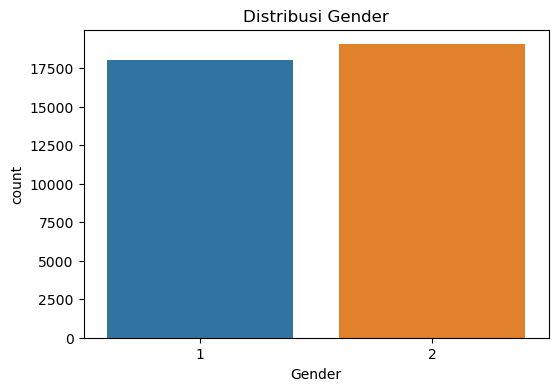

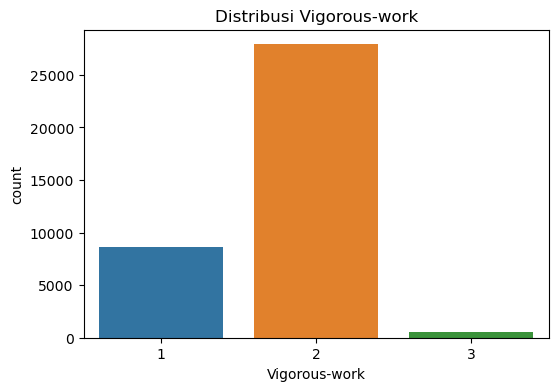

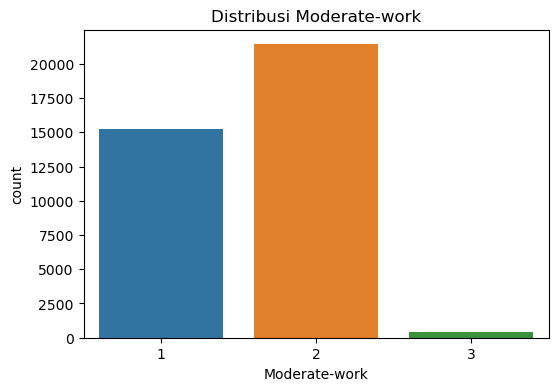

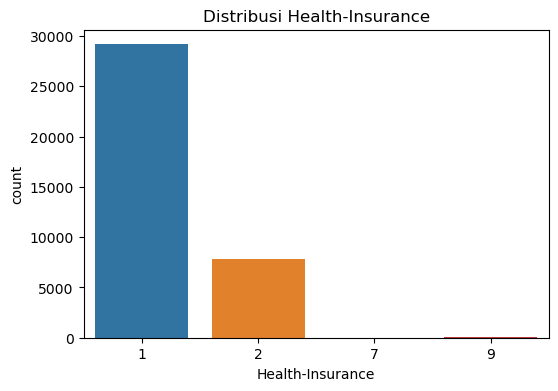

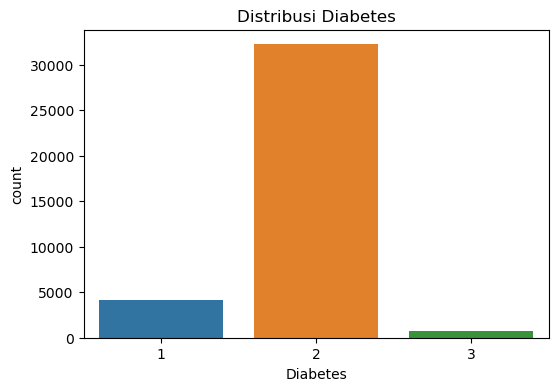

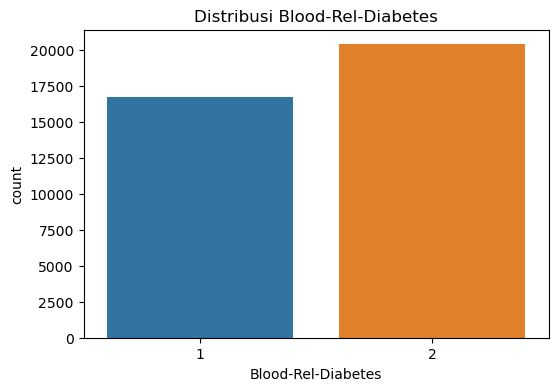

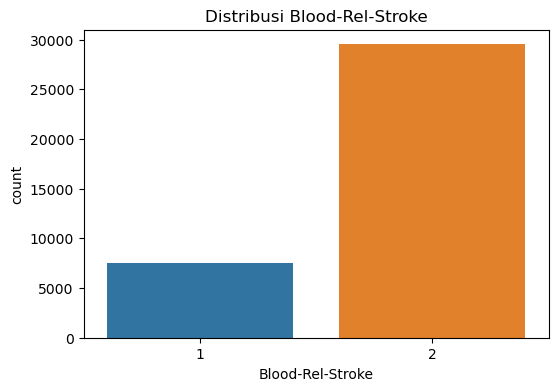

In [35]:
categorical_features = ['Gender', 'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribusi {feature}')
    plt.show()

Among the categorical features:
    * `Vigorous-work`, `Health-Insurance`, `diabetes`, `Blood-Rel-Stroke` are highly imbalanced.]

#### Numerical Features

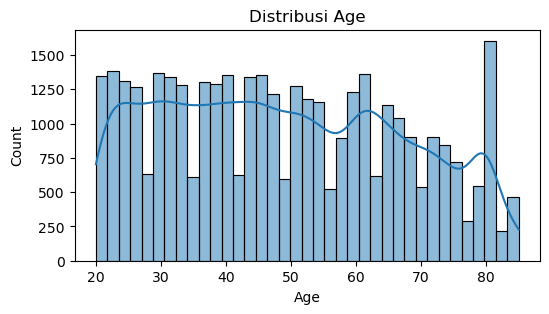

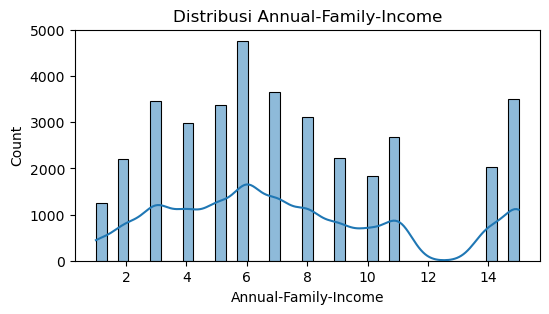

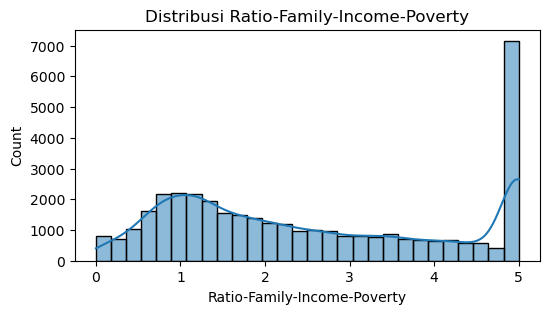

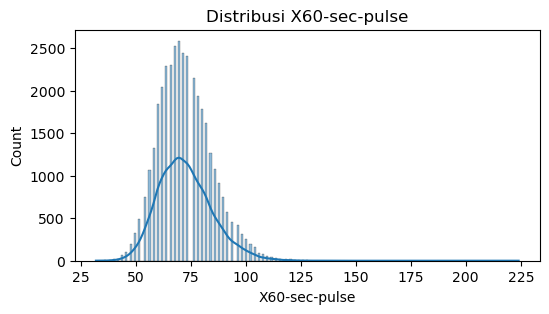

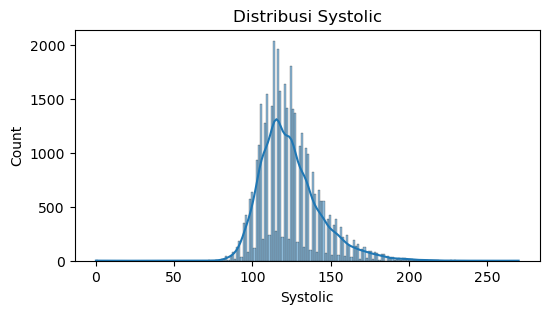

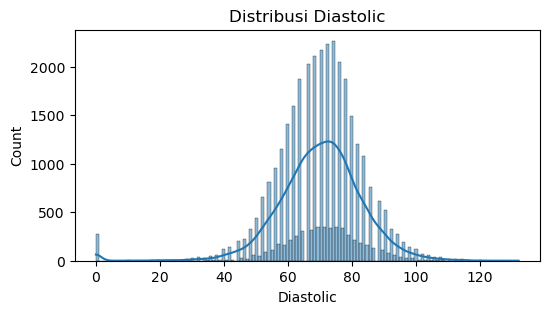

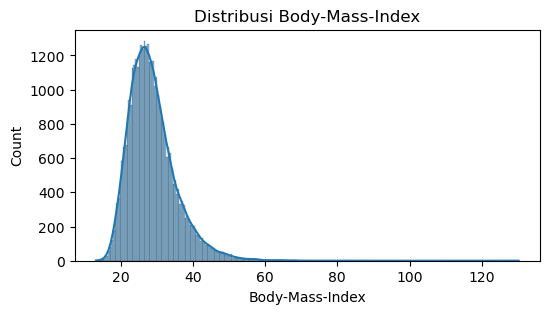

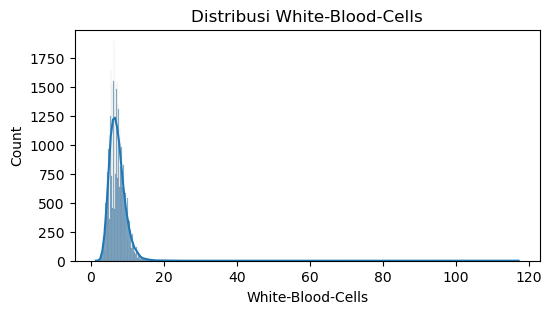

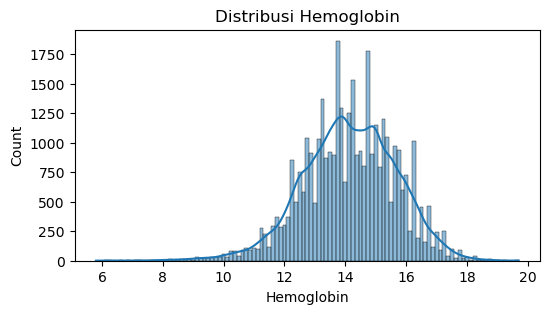

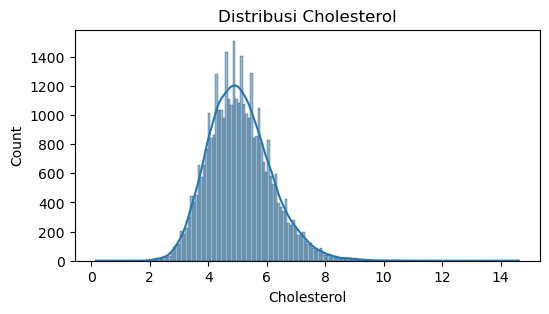

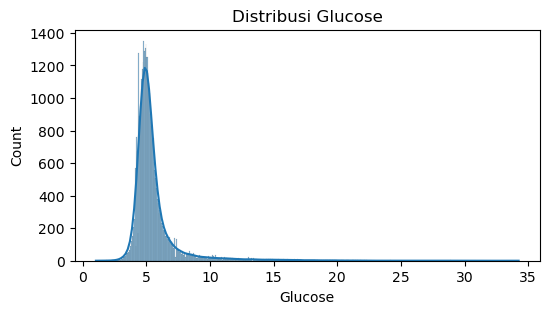

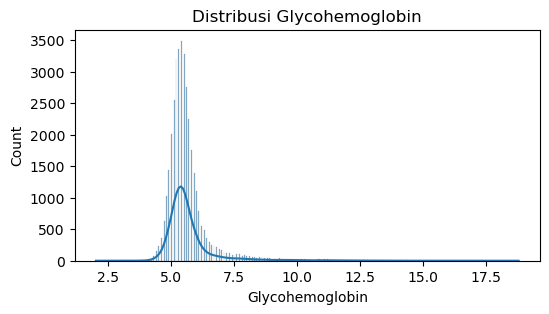

In [36]:
#visualisasi distribusi untuk fitur numerikal menggunakan histogram.
numerical_features = ['Age', 'Annual-Family-Income', 'Ratio-Family-Income-Poverty', 
                    'X60-sec-pulse', 'Systolic', 'Diastolic', 'Body-Mass-Index', 
                    'White-Blood-Cells', 'Hemoglobin', 'Cholesterol', 
                    'Glucose', 'Glycohemoglobin']

# Menghapus fitur kategorikal yang mungkin secara tidak sengaja dianggap sebagai numerik
numerical_features = [feature for feature in numerical_features if feature not in categorical_features]

for feature in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()


Among the numerical features:
* `totChol`, `sysBP`, `diaBP`and `BMI` has an uniform distribution and the rest are unevenly distributed
* `cigsPerDay` has a highly uneven distribution with the most data present in 0 
* `cigsPerDay` and `sysBP` shows quite a bit and slight right skewness respectively.

# Bivariate Analysis

#### Relationship between education and cigsPerDay

In [ ]:
#Grouping education and cigsPerDay

graph_1 = data.groupby("education", as_index=False).cigsPerDay.mean()

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is no linear relationship observed.
* Level 3 `education` shows the lowest mean.

#### Which gender has more risk of coronary heart disease CHD

In [ ]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = data.groupby("male", as_index=False).TenYearCHD.sum()

In [ ]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

According to this dataset, `males` have shown a slighly higher risk of coronary heart disease `TenYearCHD`.

#### Which age group has more smokers.

In [ ]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Mid-age groups ranging from the age of 38 - 46 have more number of `currentSmokers`
* No `currentSmokers` observed below the `age` of 32 
* maximum age for a `currentSmokers` is 70 

#### Relation between cigsPerDay and risk of coronary heart disease.

In [ ]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=data,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

* Low `cigsPerDay` comes with lower risk of CHD.
* Those who don't smoke, i.e., with a `cigsPerDay` of 0.0 has a really low risk of contracting the disease
* Although that is the case, low `cigsPerDay` doesn't actually guarantee a much lower risk of CHD

#### Relation between sysBP and risk of CHD.

In [ ]:
# Grouping up the data and ploting it

graph_3 = data.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation of higher risk of `TenYearCHD` found with higher `sysBP`
* Majority of people with `sysBP` ranging from 72 - 130 has lower chance of contracting the disease.

#### Relation between diaBP and risk of CHD

In [ ]:
# Grouping up the data and ploting it

graph_4 = data.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation found between higher risk of `TenYearCHD` with higher `diaBP` similar to the previous one
* Majority of people with `diaBP` ranging upto 80.0 has lower chance of contracting the disease.

#### Relation between age and totChol

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=data)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

### 3. Multivariate Analysis

#### Relationship between age and cigsPerDay, totChol, glucose.

In [ ]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is a minor relation between `totChol` and `glucose`.
* `totChol` has a steep, linear and inverse graph for lower ranges of `age`
* `cigsPerDay` has a fairly parallel relationship with `age`

#### Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes

In [ ]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('sysBP', 'diaBP', 
           data=data,
           hue="TenYearCHD",
           col="male",row="currentSmoker")
plt.show()

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

# Target Variable

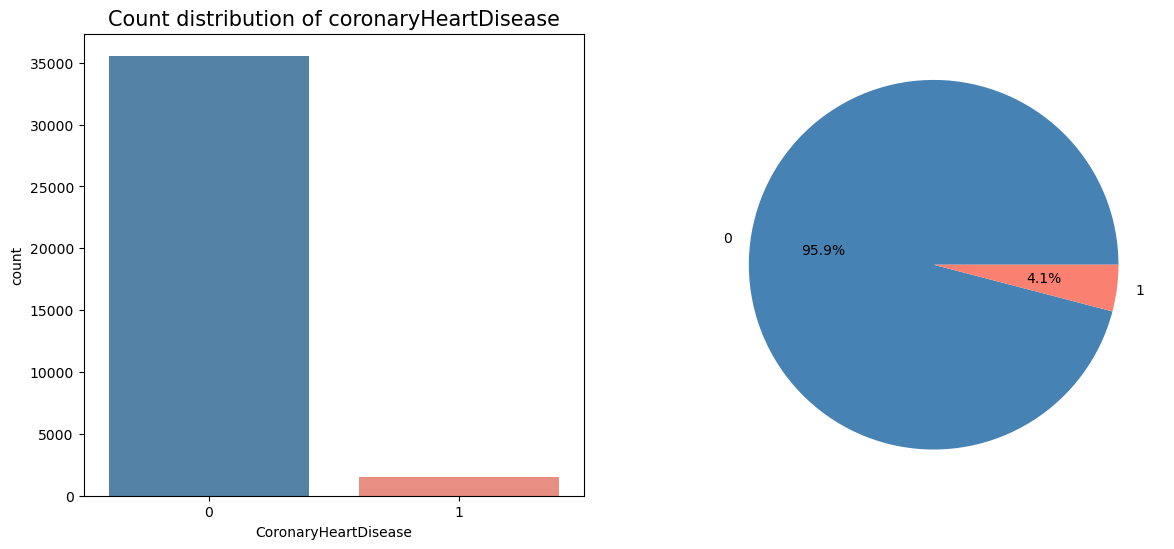

In [5]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(8, 6), facecolor='w')
plt.subplots_adjust(right=1.5)

# Set the color palette
custom_palette = ["steelBlue", "salmon"]

#first subplot
plt.subplot(121)
sns.countplot(x="CoronaryHeartDisease", data=data, palette=custom_palette)

plt.title("Count distribution of coronaryHeartDisease", size=15)


#first subplot
plt.subplot(122)
labels=[0,1]
plt.pie(data["CoronaryHeartDisease"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["steelBlue","salmon"])

plt.show()


Distribusinya sangat tidak seimbang. Pasalnya, jumlah kasus negatif lebih banyak dibandingkan jumlah kasus positif. Hal ini akan menyebabkan masalah ketidakseimbangan kelas saat menyesuaikan model. Oleh karena itu, permasalahan ini perlu diatasi.

# Resampling imbalanced dataset by oversampling positive cases

In [6]:
print(np.shape(data))
print(data.duplicated().sum())

(37079, 51)
0


In [7]:
data['CoronaryHeartDisease'].value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

In [8]:
target1=data[data['CoronaryHeartDisease']==1]
target0=data[data['CoronaryHeartDisease']==0]

In [9]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [10]:
target=pd.concat([target0,target1])
print(target)

        SEQN  Gender  Age  Annual-Family-Income  Ratio-Family-Income-Poverty  \
0          2       1   77                     8                         5.00   
1          5       1   49                    11                         5.00   
2         12       1   37                    11                         4.93   
3         13       1   70                     3                         1.07   
4         14       1   81                     5                         2.67   
...      ...     ...  ...                   ...                          ...   
33643  85880       2   52                     8                         2.41   
27433  70336       2   74                     6                         1.62   
27433  70336       2   74                     6                         1.62   
24061  62409       2   80                     3                         1.16   
16001  44243       1   60                    15                         5.00   

       X60-sec-pulse  Systolic  Diastol

In [11]:
target['CoronaryHeartDisease'].value_counts()

0    35571
1    35571
Name: CoronaryHeartDisease, dtype: int64

In [12]:
np.shape(data['SEQN'])

(37079,)

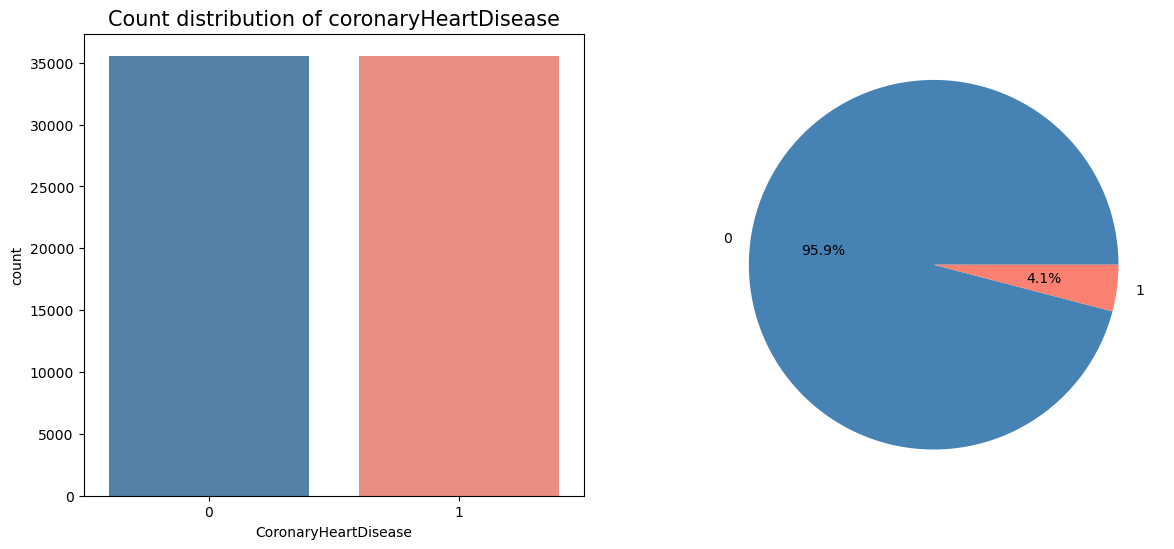

In [13]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(8, 6), facecolor='w')
plt.subplots_adjust(right=1.5)

# Set the color palette
custom_palette = ["steelBlue", "salmon"]

#first subplot
plt.subplot(121)
sns.countplot(x="CoronaryHeartDisease", data=target, palette=custom_palette)
plt.title("Count distribution of coronaryHeartDisease", size=15)


#first subplot
plt.subplot(122)
labels=[0,1]
plt.pie(data["CoronaryHeartDisease"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["steelBlue","salmon"])

plt.show()


In [16]:
are_rows_equal = target.duplicated().any()

if are_rows_equal:
    print("Ada baris yang sama di antara kedua dataframe.")
    print(target.duplicated().sum()) 
else:
    print("Tidak ada baris yang sama di antara kedua dataframe.")
    
  

Ada baris yang sama di antara kedua dataframe.
34063


In [19]:
resampled_data = target.drop_duplicates()
print(np.shape(resampled_data))
print(resampled_data.duplicated().sum())

(37079, 51)
0


The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

# Resampling imbalanced dataset by oversampling positive cases Using SMOTE

In [13]:
#SMOTE
from imblearn.over_sampling import SMOTE

In [45]:
# x atribut yang mempengaruhi CoronaryHeartDisease (independent variable)
# y atribut label (dependent)
x = data2.drop(['CoronaryHeartDisease'], axis=1)
y = data2['CoronaryHeartDisease']

In [47]:
sm = SMOTE(random_state=30)

# sampling SMOTE
x_sampling, y_sampling = sm.fit_resample(x,y)

# Convert arrays to DataFrame and Series
x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_series = pd.Series(y_sampling, name=y.name)

# Combine the resampled minority class with the majority class
resampled_data2 = pd.concat([x_sampling_df, y_sampling_series], axis=1)

# Print the resampled data
print(resampled_data2)

        SEQN  Gender  Age  Annual-Family-Income  Ratio-Family-Income-Poverty  \
0          2       1   77                     8                     5.000000   
1          5       1   49                    11                     5.000000   
2         12       1   37                    11                     4.930000   
3         13       1   70                     3                     1.070000   
4         14       1   81                     5                     2.670000   
...      ...     ...  ...                   ...                          ...   
71137  32967       1   71                     6                     2.609381   
71138  47670       1   77                     5                     2.113107   
71139  75924       1   80                    14                     5.000000   
71140   8925       1   56                     4                     2.542048   
71141  63202       1   80                     3                     0.928788   

       X60-sec-pulse  Systolic  Diastol

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='CoronaryHeartDisease'>

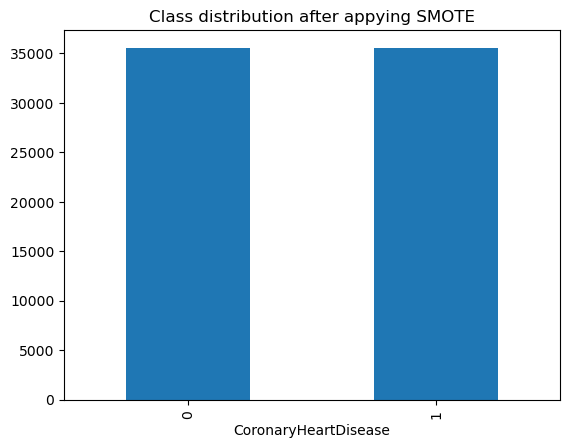

In [48]:
pd.Series(y_sampling).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='CoronaryHeartDisease')

In [49]:
are_rows_equal = resampled_data2.duplicated().any()

if are_rows_equal:
    print("Ada baris yang sama di antara kedua dataframe.")
else:
    print("Tidak ada baris yang sama di antara kedua dataframe.")

# Mengecek duplikasi setelah resampling
print("Jumlah baris duplikat setelah resampling:", resampled_data2.duplicated().sum())

Tidak ada baris yang sama di antara kedua dataframe.
Jumlah baris duplikat setelah resampling: 0


# Feature Selection


In [ ]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

In [ ]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [ ]:
fit=best.fit(X,y)

In [ ]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [ ]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

In [ ]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This plot shows the `Features` and their respective `chi-square test` scores

In [ ]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

Only these features have strongest influence over the target variable. They are, in particular order:
* sysBP
* glucose
* age
* cigsPerDay
* totChol
* diaBP
* prevalentHyp
* male
* BPMeds
* diabetes


In [ ]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

# Feature Splitting and Scaling

In [ ]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

We divide the dataset into training and test sub-datasets for predictive modeling

In [ ]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Menghitung korelasi

In [6]:
data.describe()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,...,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,48901.041236,1.513282,48.943661,7.358208,2.559026,72.579250,124.090078,69.919253,80.988276,167.389601,...,5.081713,1.370344,5.676496,1.783840,1.598856,1.218587,1.907333,1.549502,1.796165,0.040670
std,26753.636441,0.499830,18.010440,3.994083,1.624789,12.242108,19.254741,13.575804,20.678734,10.122908,...,1.072682,0.415985,1.050223,0.448324,0.511199,0.461102,0.349674,0.497550,0.402853,0.197527
min,2.000000,1.000000,20.000000,1.000000,0.000000,32.000000,0.000000,0.000000,32.300000,129.700000,...,1.530000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,26120.500000,1.000000,33.000000,4.000000,1.140000,64.000000,111.000000,62.000000,66.500000,160.000000,...,4.320000,1.070000,5.200000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,50065.000000,2.000000,48.000000,7.000000,2.180000,72.000000,121.000000,70.000000,78.200000,167.100000,...,5.020000,1.290000,5.400000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
75%,71173.500000,2.000000,63.000000,10.000000,4.130000,80.000000,134.000000,78.000000,92.100000,174.600000,...,5.740000,1.600000,5.800000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
max,93702.000000,2.000000,85.000000,15.000000,5.000000,224.000000,270.000000,132.000000,371.000000,204.500000,...,14.090000,5.840000,18.800000,3.000000,3.000000,9.000000,3.000000,2.000000,2.000000,1.000000


In [8]:
# Menghitung korelasi
korelasi = data.corr()

print(korelasi)

                                 SEQN    Gender       Age  \
SEQN                         1.000000 -0.001776  0.001023   
Gender                      -0.001776  1.000000 -0.031112   
Age                          0.001023 -0.031112  1.000000   
Annual-Family-Income         0.178423 -0.044304 -0.042854   
Ratio-Family-Income-Poverty -0.044699 -0.051150  0.051216   
X60-sec-pulse                0.011624  0.154636 -0.149767   
Systolic                    -0.034467 -0.087586  0.470331   
Diastolic                   -0.030211 -0.116799 -0.042284   
Weight                       0.045199 -0.266853 -0.035815   
Height                      -0.019020 -0.671155 -0.136000   
Body-Mass-Index              0.059610  0.059787  0.029349   
White-Blood-Cells           -0.006061  0.041347 -0.073692   
Lymphocyte                   0.050807  0.043523 -0.097218   
Monocyte                     0.006424 -0.198896  0.153205   
Eosinophils                  0.009960 -0.124137  0.073331   
Basophils               

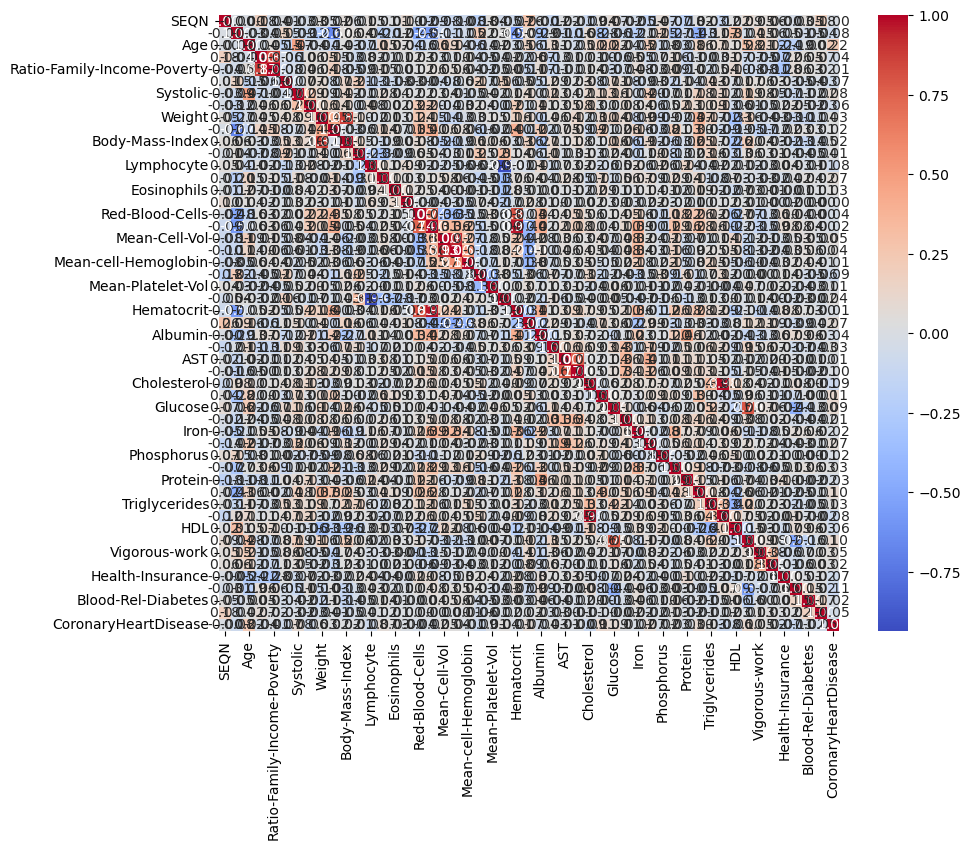

In [9]:
# Visualisasi heatmap matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
SEQN,1.000000,-0.001776,0.001023,0.178423,-0.044699,0.011624,-0.034467,-0.030211,0.045199,-0.019020,...,-0.122045,0.023288,0.085223,0.054571,0.056670,-0.001002,-0.032711,0.054461,0.176478,-0.004985
Gender,-0.001776,1.000000,-0.031112,-0.044304,-0.051150,0.154636,-0.087586,-0.116799,-0.266853,-0.671155,...,0.074376,0.308572,-0.042684,0.151403,0.058853,-0.049752,0.014295,-0.054130,-0.043613,-0.078408
Age,0.001023,-0.031112,1.000000,-0.042854,0.051216,-0.149767,0.470331,-0.042284,-0.035815,-0.136000,...,0.109633,0.050450,0.283285,0.207679,0.117950,-0.243152,-0.190432,-0.000434,0.024753,0.222649
Annual-Family-Income,0.178423,-0.044304,-0.042854,1.000000,0.871092,-0.056541,-0.098798,0.059053,0.052287,0.147919,...,0.005405,0.066386,-0.070729,-0.053815,-0.066759,-0.219581,0.064417,0.046367,0.073422,-0.037952
Ratio-Family-Income-Poverty,-0.044699,-0.051150,0.051216,0.871092,1.000000,-0.075063,-0.043048,0.057912,0.042693,0.178176,...,0.037638,0.095717,-0.083041,-0.078578,-0.108287,-0.278860,0.062939,0.033664,0.022297,-0.012472
X60-sec-pulse,0.011624,0.154636,-0.149767,-0.056541,-0.075063,1.000000,-0.067331,0.070437,0.081700,-0.069522,...,0.074914,-0.013026,0.071834,0.055944,0.026132,0.028147,-0.049708,-0.044430,-0.026403,-0.071665
Systolic,-0.034467,-0.087586,0.470331,-0.098798,-0.043048,-0.067331,1.000000,0.291440,0.091775,-0.037876,...,0.123008,-0.007716,0.194386,0.080616,0.054855,-0.072830,-0.114630,-0.022145,-0.016304,0.080224
Diastolic,-0.030211,-0.116799,-0.042284,0.059053,0.057912,0.070437,0.291440,1.000000,0.159274,0.138489,...,0.134689,-0.058785,0.013660,-0.049090,-0.021464,0.023733,0.053482,-0.019804,-0.034457,-0.060056
Weight,0.045199,-0.266853,-0.035815,0.052287,0.042693,0.081700,0.091775,0.159274,1.000000,0.446036,...,-0.017357,-0.327821,0.161540,-0.040041,-0.033930,-0.030625,-0.102847,-0.109636,-0.043797,0.029003
Height,-0.019020,-0.671155,-0.136000,0.147919,0.178176,-0.069522,-0.037876,0.138489,0.446036,1.000000,...,-0.085704,-0.192221,-0.045649,-0.170768,-0.119986,-0.019971,0.034625,0.034984,0.005587,0.016818


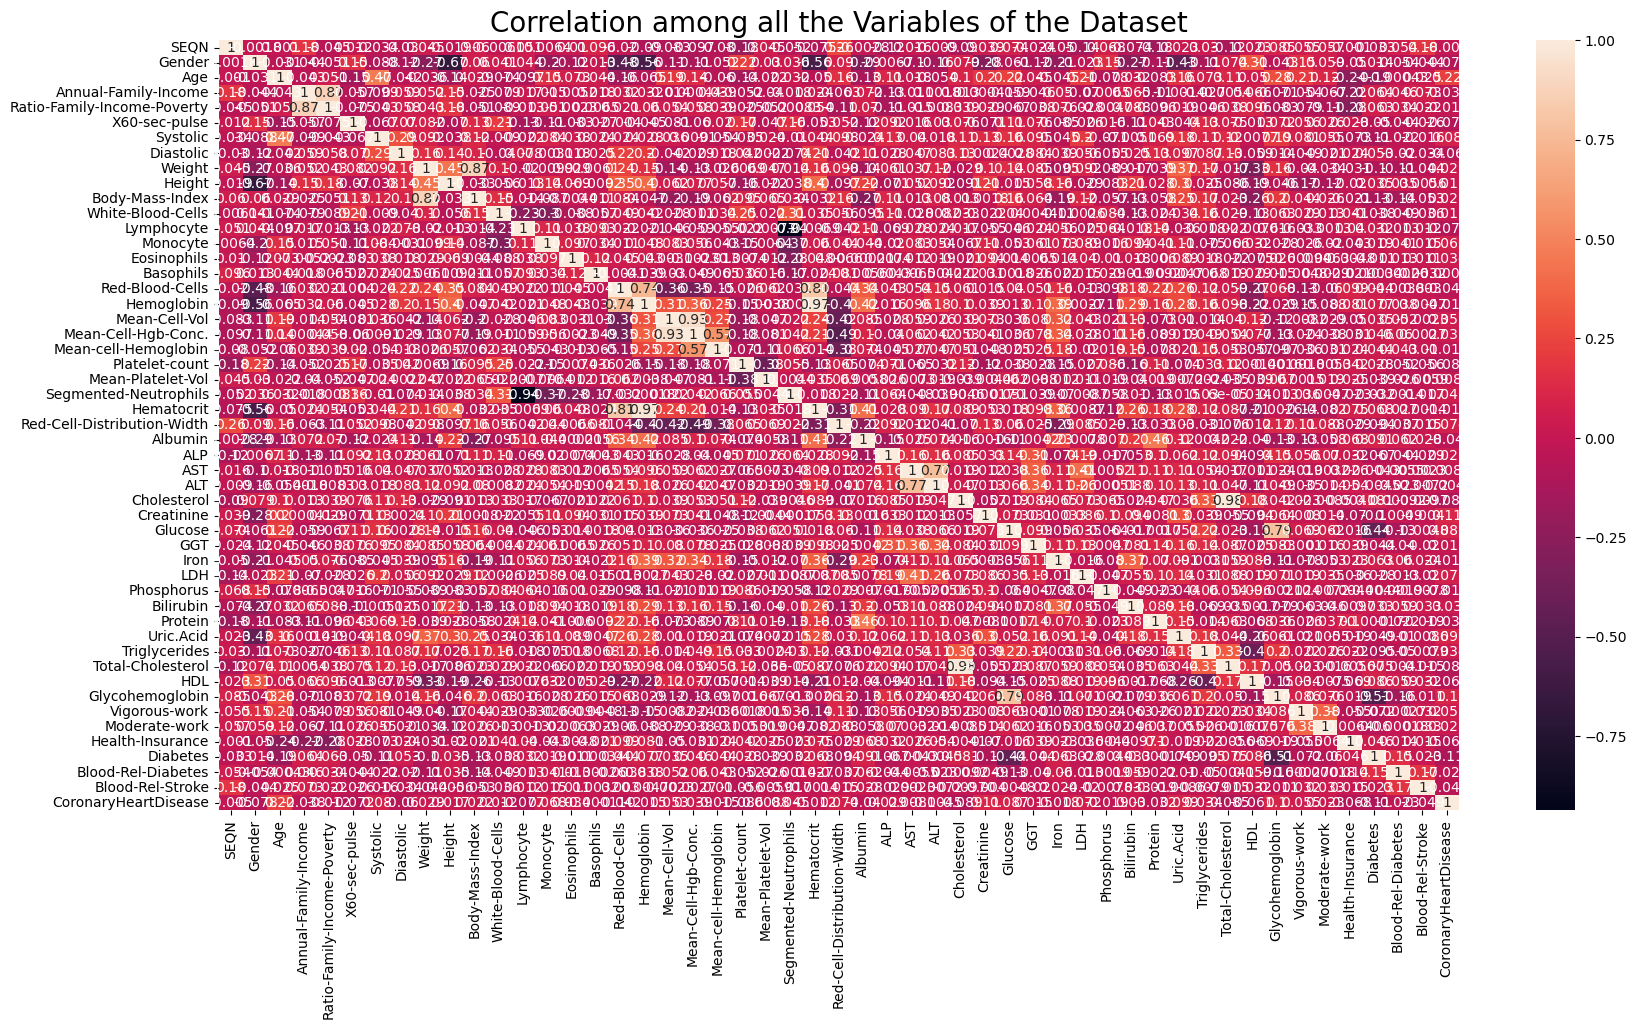

In [10]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [11]:
#delete irrelevant attribute
data = data.drop(['SEQN'],axis=1)
data

,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,Body-Mass-Index,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,1,77,8,5.00,68,98,56,75.4,174.0,24.90,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,1,49,11,5.00,66,122,83,92.5,178.3,29.10,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,1,37,11,4.93,64,174,99,99.2,180.0,30.62,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,1,70,3,1.07,102,130,66,63.6,157.7,25.57,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,1,81,5,2.67,72,136,61,75.5,166.2,27.33,...,4.50,1.04,5.8,1,1,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,1,25,10,1.59,92,112,76,39.2,136.5,21.00,...,4.14,1.27,5.8,2,2,1,2,1,2,0
37075,2,76,4,1.43,78,112,46,59.1,165.8,21.50,...,3.62,1.76,5.6,2,2,1,2,2,2,0
37076,2,80,7,2.97,74,146,58,71.7,152.2,31.00,...,6.62,2.90,5.7,2,2,1,2,2,2,0
37077,1,35,1,0.00,76,106,66,78.2,173.3,26.00,...,3.72,1.09,5.2,2,2,1,2,2,1,0


# Predictive Modeling

We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier

In [ ]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

In [ ]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

In [ ]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

In [ ]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

## Hyperparameter Tuning for best Classifier
#### Using Randomized Search Cross Validation

### Random Forest Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

In [ ]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

### Gradient Boosting Classifier

In [ ]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

In [ ]:
gb_hyper = gb_random.best_estimator_
gb_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(gb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(test_x, test_y)))
gbc_predicted = gb_hyper.predict(test_x)
gbc_acc_score = accuracy_score(test_y, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(test_y, gbc_predicted))

In [ ]:
#Number of neighbors
n_neighbors = np.arange(1, 10)
#Number of weights
weights = ['uniform','distance']
#metric
metric = ['euclidean', 'manhattan', 'minkowski']

#Create the random grid
random_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Berbagai nilai untuk n_neighbors
    'weights': ['uniform', 'distance'],  # Pilihan untuk jenis bobot
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Pilihan untuk algoritma
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Pilihan metrik jarak
#     'p': [1, 2],  # Nilai p untuk metrik Minkowski
}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsClassifier()

# Inisialisasi RandomizedSearchCV
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=random_grid,
                                   n_iter=100,  # Jumlah kombinasi yang akan diuji
                                   scoring='f1',  # Metrik evaluasi yang digunakan
                                   cv=3,  # Jumlah lipatan validasi silang (cross-validation)
                                   verbose=2,  # Tingkat verbosity
                                   n_jobs=-1,  # Menggunakan semua CPU yang tersedia
                                   random_state=0,  # Seed untuk reproduksi
                                   return_train_score=True)

# Melatih model dengan pencarian acak
knn_random.fit(train_x, train_y)

In [ ]:
knn_hyper = knn_random.best_estimator_
knn_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(knn_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(knn_hyper.score(test_x, test_y)))
knnc_predicted = knn_hyper.predict(test_x)
knnc_acc_score = accuracy_score(test_y, knnc_predicted)
print("Accuracy of Hyper-tuned K Nearest Neighbor:",knn_acc_score*100,'\n')
print(classification_report(test_y, knnc_predicted))

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(test_y,gbc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gbc_acc_score*100]})
model_ev

In [ ]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [ ]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gb_hyper, knn], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
scv_rec_score = recall_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print("Recall of StackingCVClassifier:",scv_rec_score*100,'\n')

print(classification_report(test_y,scv_predicted))

In [ ]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gb_hyper], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
scv_rec_score = recall_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print("Recall of StackingCVClassifier:",scv_rec_score*100,'\n')

print(classification_report(test_y,scv_predicted))